# Titanic dataset overview 
*The Challenge*

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"/Users/sa8/Desktop/Titanic/csv_data/train.csv"
file_path1 = r"/Users/sa8/Desktop/Titanic/csv_data/test.csv"

train_data = pd.read_csv(file_path)
test_data = pd.read_csv(file_path1)



In [45]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [46]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [47]:
#Combining test and train datasets to work on eda altogehter 
df = pd.concat([train_data, test_data])

In [48]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [51]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [52]:
#Handling the missing data 
 
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
df['HasCabin'] = df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)




/var/folders/w7/jd1z45j96837md4q7byfwykm0000gn/T/ipykernel_79631/577519301.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
/var/folders/w7/jd1z45j96837md4q7byfwykm0000gn/T/ipykernel_79631/577519301.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

Handling Missing Data

- Age – Estimating Missing Ages Thoughtfully
  - Instead of dropping these rows, estimate the missing ages by calculating the median age for groups based on 'Pclass' and 'Sex'. This approach maintains the dataset's integrity while providing reasonable estimates.​

- Cabin – Creating a New Feature for Cabin Information
  - Rather than attempting to fill in these missing cabin numbers, create a new binary feature, such as 'HasCabin', indicating whether a cabin number is present. This can help capture the potential significance of having a cabin assignment without relying on the specific cabin details.​

- Survived – Understanding the Target Variable
  - No action is needed here, as the missing values in the test set are what your model aims to predict.​

- Embarked – Filling in Missing Embarkation Points
  - Fill these in with the most common embarkation point among passengers, ensuring consistency without significantly impacting the dataset's integrity.​

- Fare – Addressing a Single Missing Fare Value
  - Replace this missing fare with the median fare value, maintaining the dataset's balance and avoiding potential skewness.​

In [56]:
#How the data looks after handling the missing data 
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
HasCabin          0
dtype: int64

In [57]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,HasCabin
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.261398,0.498854,0.385027,33.281086,0.225363
std,378.020061,0.486592,0.837836,13.218275,1.041658,0.865560,51.741500,0.417981
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,1.000000,3.000000,36.000000,1.000000,0.000000,31.275000,0.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


# Univariate Analysis

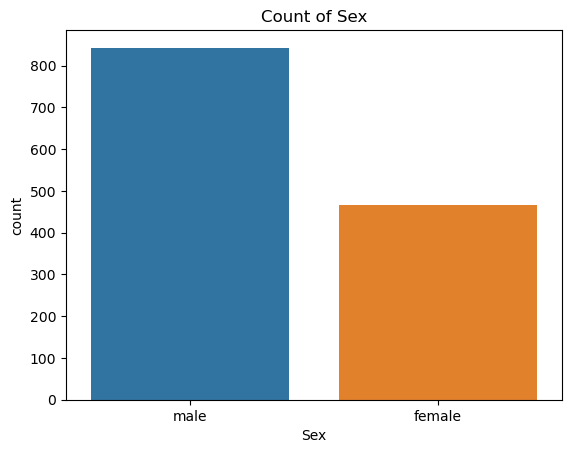

In [76]:
sns.countplot(df, x='Sex', hue= 'Sex')
plt.title('Count of Sex')
plt.show()





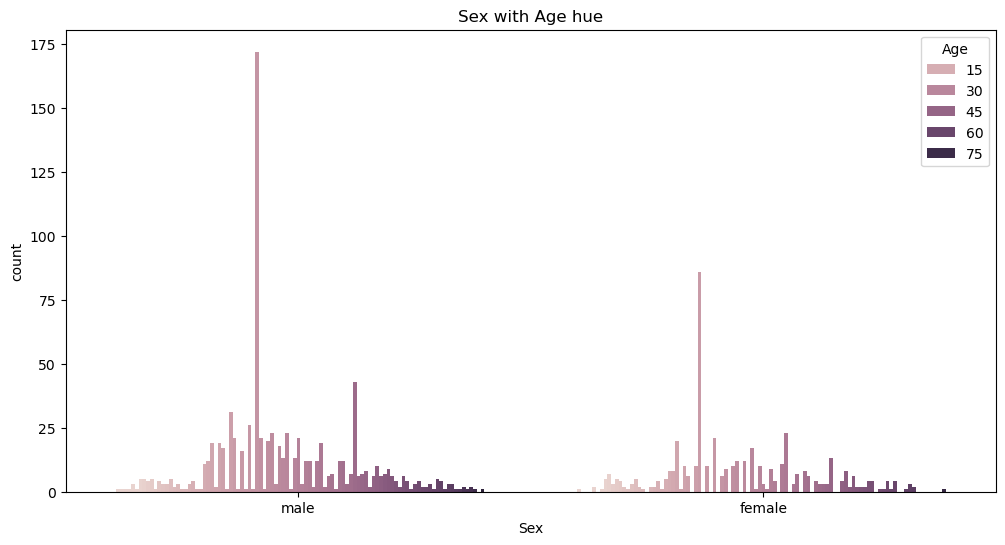

In [75]:
plt.figure(figsize=(12, 6))
sns.countplot(df, x='Sex', hue= 'Age')
plt.title('Sex with Age hue')
plt.show()